In [331]:
import pandas as pd

train_dataset = pd.read_csv('train_dataset.csv')
test_dataset = pd.read_csv('test_dataset.csv') 

Tamaño del dataset: (6093, 23)
Nulos: 0
Duplicados: 0


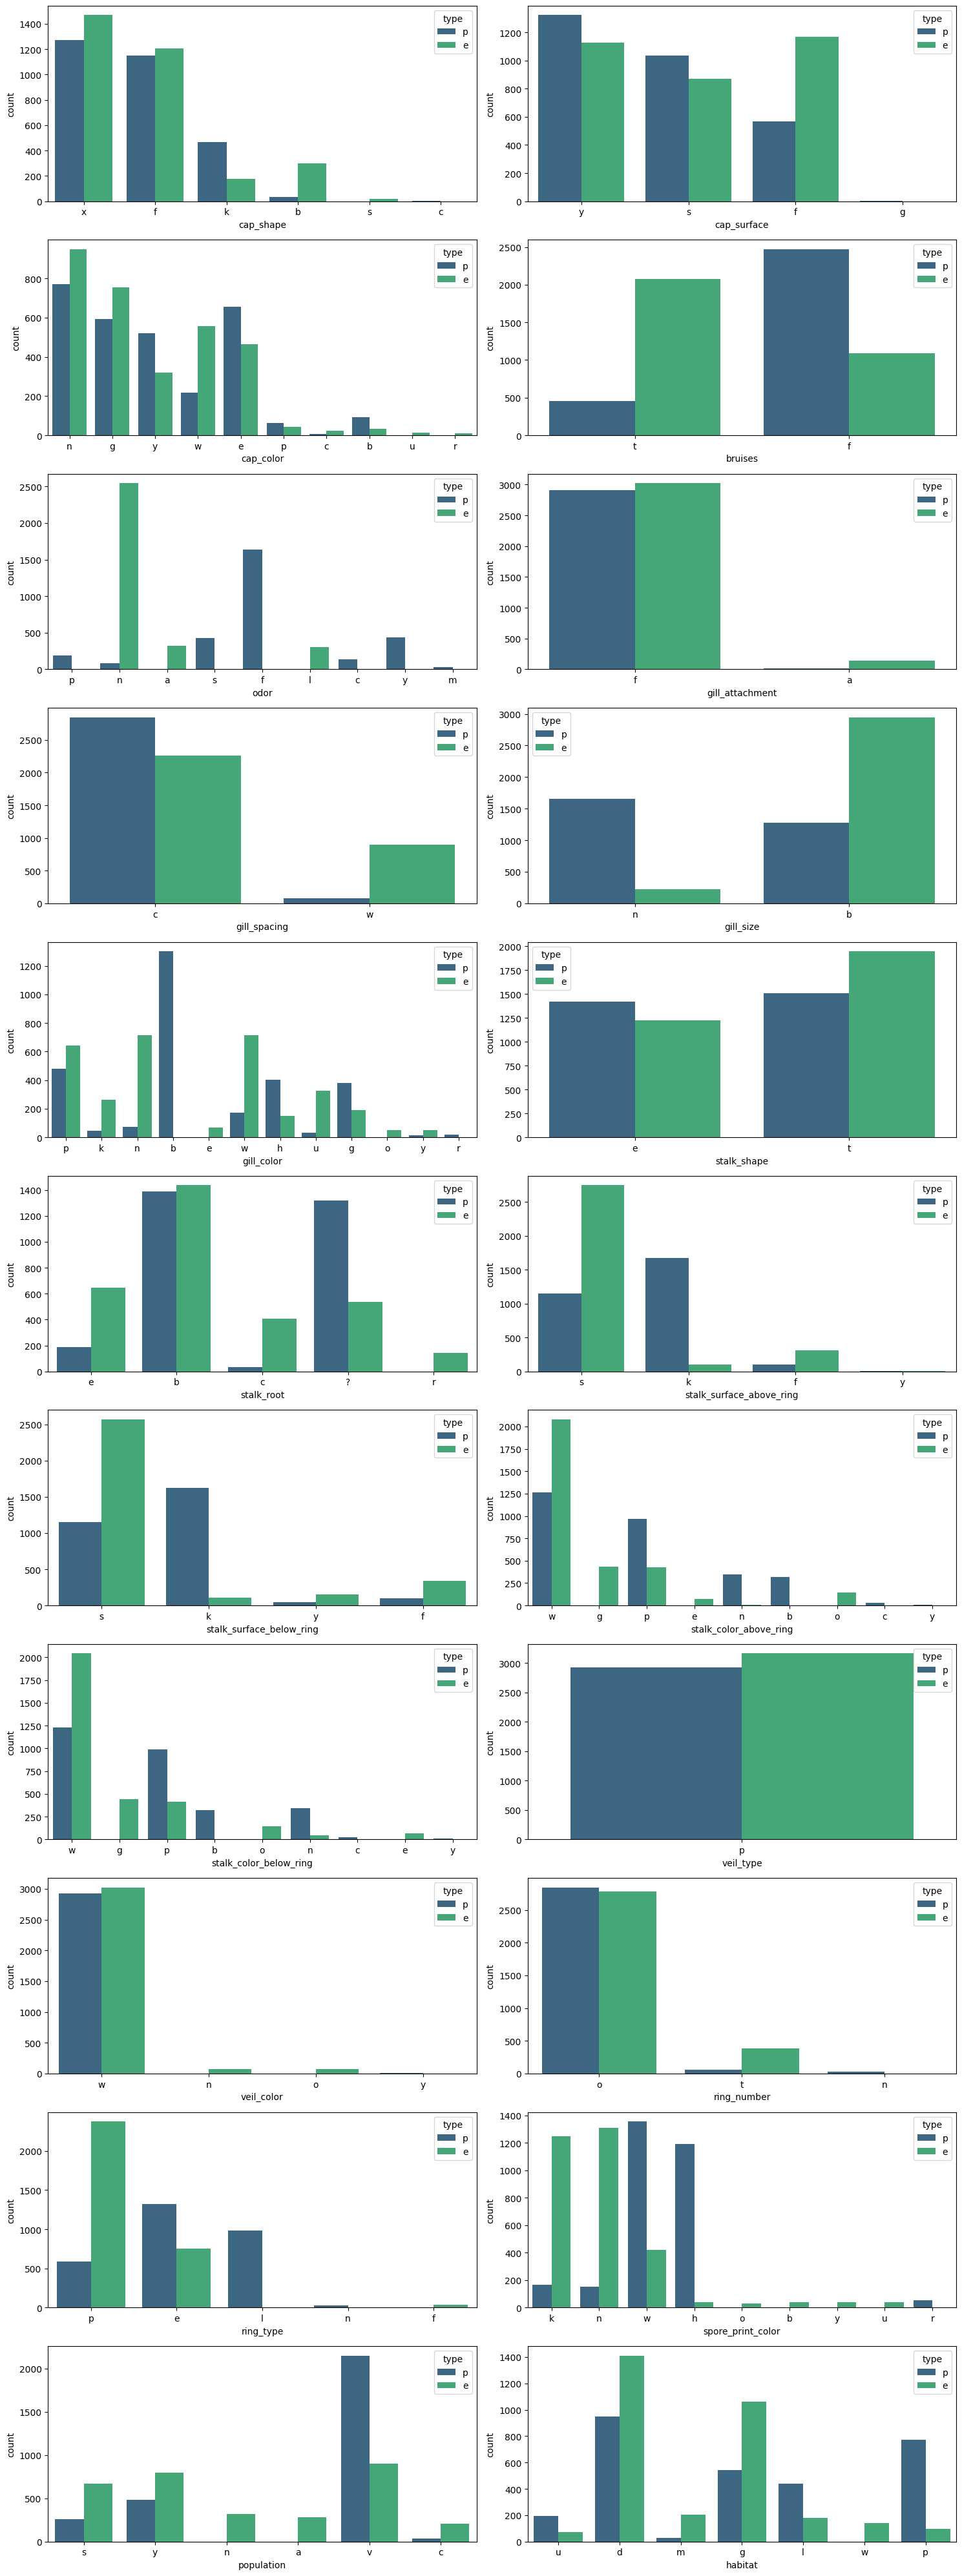

In [334]:
import matplotlib.pyplot as plt
import seaborn as sb

cat_cols = train_dataset.columns.to_list()
cat_cols.remove('type')

_, ax = plt.subplots(11, 2, figsize=(15, 40))

ax = ax.flatten()

for i, col in enumerate(cat_cols):
    sb.countplot(data=train_dataset, x=col, ax=ax[i], hue='type')

plt.tight_layout()
plt.show()

In [335]:
train_dataset['stalk_root'].value_counts()

stalk_root
b    2824
?    1856
e     834
c     438
r     141
Name: count, dtype: int64

In [336]:
train_dataset[train_dataset['stalk_root'] == '?']['type'].value_counts()

type
p    1320
e     536
Name: count, dtype: int64

In [337]:
test_dataset['stalk_root'].value_counts()

stalk_root
b    952
?    624
e    286
c    118
r     51
Name: count, dtype: int64

In [338]:
train_dataset_s = train_dataset.copy()
test_dataset_s = test_dataset.copy()
train_dataset_s.loc[train_dataset['stalk_root'] == '?', 'type'] = 'p'
test_dataset_s.loc[test_dataset['stalk_root'] == '?', 'type'] = 'p'
train_dataset_s[train_dataset_s['stalk_root'] == '?']['type'].value_counts()

In [339]:
train_dataset_s[train_dataset_s['stalk_root'] == '?']['type'].value_counts()


type
p    1856
Name: count, dtype: int64

In [340]:

def make_pipeline(estimator):

    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    
    cat_cols = ['cap_shape',
                'cap_surface',
                'cap_color',
                'bruises',
                'odor',
                'gill_attachment',
                'gill_spacing',
                'gill_size',
                'gill_color',
                'stalk_shape',
                'stalk_root',
                'stalk_surface_above_ring',
                'stalk_surface_below_ring',
                'stalk_color_above_ring',
                'stalk_color_below_ring',
                'veil_type',
                'veil_color',
                'ring_number',
                'ring_type',
                'spore_print_color',
                'population',
                'habitat']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), cat_cols),
        ],
        remainder='passthrough'
    )


    pipeline = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('estimator', estimator),
        ],
        verbose=False,
    )

    return pipeline


In [341]:
train_dataset = pd.read_csv("train_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")

x_train = train_dataset.drop("type", axis=1)
y_train = train_dataset["type"]

x_test = test_dataset.drop("type", axis=1)
y_test = test_dataset["type"]

In [342]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression(max_iter=1000, random_state=42)
model = make_pipeline(estimator)
model.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['cap_shape', 'cap_surface',
                                                   'cap_color', 'bruises',
                                                   'odor', 'gill_attachment',
                                                   'gill_spacing', 'gill_size',
                                                   'gill_color', 'stalk_shape',
                                                   'stalk_root',
                                                   'stalk_surface_above_ring',
                                                   'stalk_surface_below_ring',
                                                   'stalk_color_above_ring',
                                                   'stalk_color_below_ring',
                                                   'veil_type', 'veil_color',
                                                   'ring_number', 'ring_type',
                                                   'spore_print_color',
                                                   'population',
                                                   'habitat'])])),
                ('estimator',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [343]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Train accuracy: {accuracy_train:.2f}")
print(f"Test accuracy: {accuracy_test:.2f}")

Train accuracy: 1.00
Test accuracy: 1.00


In [344]:
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)